In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_some_params_rework/results'
else:
    path = '/results'

In [41]:
Nsites = 2
N = 10000
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0

df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')

In [42]:
df

,N,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
205,10000.0,0.0,0.0,7.0,10.0,0.0000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
206,10000.0,0.0,0.0,7.0,10.0,0.1000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
207,10000.0,0.0,0.0,7.0,10.0,0.1010,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
208,10000.0,0.0,0.0,7.0,10.0,0.1011,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
209,10000.0,0.0,0.0,7.0,10.0,0.1012,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
210,10000.0,0.0,0.0,7.0,10.0,0.1013,0.999716,0.000000e+00,0.000284,0.001944,0.000000,0.001944,0.000284,0.001944,50.0,11000.0,E
211,10000.0,0.0,0.0,7.0,10.0,0.1014,0.999689,0.000000e+00,0.000311,0.001763,0.000000,0.001763,0.000311,0.001763,50.0,11000.0,E
212,10000.0,0.0,0.0,7.0,10.0,0.1015,0.999712,0.000000e+00,0.000288,0.001986,0.000000,0.001986,0.000288,0.001986,50.0,11000.0,E
213,10000.0,0.0,0.0,7.0,10.0,0.1016,0.998630,0.000000e+00,0.001370,0.004430,0.000000,0.004430,0.001370,0.004430,50.0,11000.0,E
214,10000.0,0.0,0.0,7.0,10.0,0.1017,0.998420,0.000000e+00,0.001580,0.004767,0.000000,0.004767,0.001580,0.004767,50.0,11000.0,E


### Different system sizes, q1=7, q2=10, pis=0

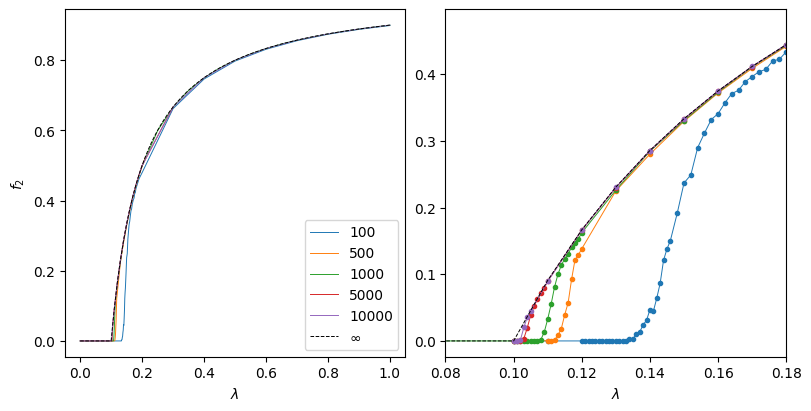

In [67]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0

fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
# fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for N in [100, 500, 1000, 5000, 10000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax[0].plot(df['l'], df['f2'], label=f'{N}', lw=0.7)
    df = df.query('l >= 0.05 & l <0.2')
    ax[1].plot(df['l'], df['f2'], label=f'{N}', lw=0.7, marker='.')
    # df = df.query('l >= 0.1 & l <0.2')
    # df['lmod'] = (df['l']-0.1)*100
    # ax[2].plot(df['lmod'], df['f2'], label=f'{N}', lw=0.7, marker='.')

# results from the deterministic equations
df = pd.read_csv(extSSDpath + getProjectFoldername() + f'/det_sols_from_polynomial/res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
ax[0].plot(df['l'], df['f2'], lw=0.7, color='xkcd:black', ls='--', label=r'$\infty$')
df = df.query('l >= 0.05 & l <0.2')
ax[1].plot(df['l'], df['f2'], label=f'{N}', lw=0.7, color='xkcd:black', ls='--')
ax[1].set_xlim(0.08, 0.18)
# ax[2].set_xlim(0.0, 0.1)
ax[0].set_xlabel(r'$\lambda$')
ax[1].set_xlabel(r'$\lambda$')
ax[0].set_ylabel(r'$f_2$')
ax[0].legend()
fig.savefig(f'sim_at_pis_0_difN_q1_{q1}_q2_{q2}.png')

In [2]:
def powerLaw(x,a,b):
    return b*x**a

from scipy.optimize import curve_fit

0.1013


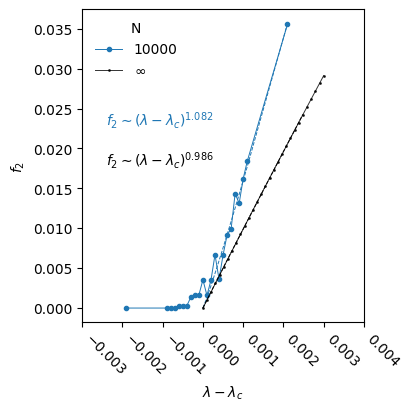

In [43]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0
Nsites = 2

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
for N in [10000, ]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    df = df.query('l >= 0.09 & l <0.105')
    dfaux = df.query('f2 > 0')
    lc = float(dfaux['l'].iloc[0])
    print(lc)
    lc = 0.1019
    # df['ln'] = (df['l'] - lc)/df['l']
    # df['ln'] = (df['l'] - lc)/lc
    df['ln'] = (df['l']) - lc
    dfaux = df.query('l >= @lc & l < 0.105')
    popt, _ = curve_fit(powerLaw, dfaux['ln'], dfaux['f2'])
    # ax.plot(df['ln'], df['f2'], label=f'{N}', lw=0.7, marker='.')
    line, = ax.plot(df['ln'], df['f2'], label=f'{N}', ls=None, lw=0.7, marker='.')
    ax.plot(dfaux['ln'], popt[1]*dfaux['ln']**popt[0], color=line.get_color(), ls='--', lw=0.7)
    fig.text(0.25, 0.7, rf'$f_2 \sim (\lambda-\lambda_c)^{{{round(popt[0],3)}}}$', color=line.get_color())


# results from the deterministic equations
df = pd.read_csv(extSSDpath + getProjectFoldername() + f'/det_sols_from_polynomial/res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_around_trans.csv')
df = df.query('l >= 0.05 & l < 0.15')
# df['ln'] = (df['l'] - 0.1)/df['l']
df['ln'] = df['l'] - 0.1
# df['ln'] = (df['l'] - 0.1)/0.1
ax.plot(df['ln'], df['f2'], lw=0.7, color='xkcd:black', ls=None, marker='.', markersize=2, label=r'$\infty$', alpha=0.8)
dfaux = df.query('l >= 0.1 & l <= 0.1025')
popt, _ = curve_fit(powerLaw, dfaux['ln'], dfaux['f2'])
ax.plot(dfaux['ln'], popt[1]*dfaux['ln']**popt[0], color='xkcd:black', ls='--', lw=0.7)
# print(popt)
fig.text(0.25, 0.6, rf'$f_2 \sim (\lambda-\lambda_c)^{{{round(popt[0],3)}}}$', color='xkcd:black')
# ax.set_xlim(0.08, 0.18)
# ax.set_xlabel(r'($\lambda - \lambda_c)/\lambda$')
ax.set_xlabel(r'$\lambda - \lambda_c$')
ax.set_ylabel(r'$f_2$')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=-45, ha='left')
# ax.set(xscale='symlog', yscale='symlog')
ax.legend(title='N', frameon=False)

fig.savefig(f'phaste_transiton_exponents_pis_0_q1_{q1}_q2_{q2}.png')

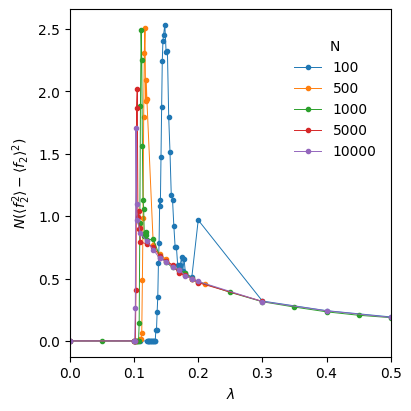

In [5]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0
Nsites = 2

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

for N in [100, 500, 1000, 5000, 10000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    df['susc'] = N*df['sdf2']**2
    # ax.plot(df['l'], df['sdf2'], label=f'{N}', lw=0.7, marker='.')
    ax.plot(df['l'], df['susc'], label=f'{N}', lw=0.7, marker='.')
fig.legend(title='N', frameon=False, loc = (0.7, 0.6))
# ax.set(xlabel='$\lambda$', ylabel=r'$\sigma_{f_2}$', xlim=(0.0,0.5))
ax.set(xlabel='$\lambda$', ylabel=r'$N(\langle f_2^{2} \rangle - \langle f_2 \rangle^{2})$', xlim=(0.0,0.5))
# fig.savefig(f'sim_at_pis_0_difN_sigf2_q1_{q1}_q2_{q2}.png')
fig.savefig(f'sim_at_pis_0_difN_suscf2_q1_{q1}_q2_{q2}.png')

### System size N=1000, different q1s, q2=10, pis=0

Text(0, 0.5, '$f_2$')

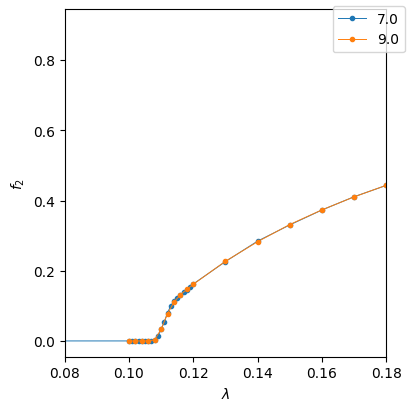

In [11]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
Nsites = 2
q1s, q2 = [7.0, 9.0], 10.0
pi1, pi2 = 0.0, 0.0
N = 1000
for q1 in q1s:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax.plot(df['l'], df['f2'], label=f'{q1}', lw=0.7, marker='.')
fig.legend()
ax.set_xlim(0.08, 0.18)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_2$')

### System size N=1000, varying the number of sites, q1,...,qk-1 = 7.0, qk = 10, pis=0.0

Text(0, 0.5, '$f_k$')

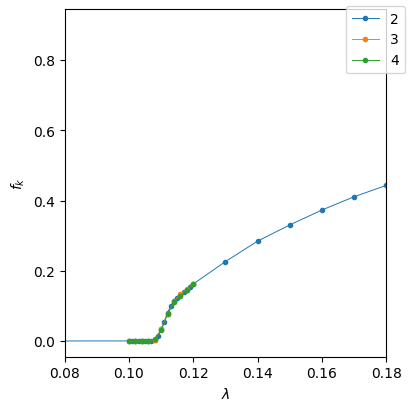

In [17]:
Nsitess = [2,3,4]
N = 1000
qk = 10.0
qlow = 7.0
pi = 0.0

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
for Nsites in Nsitess:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend()
ax.set_xlim(0.08, 0.18)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')

In [9]:
# df = df.query('l >= 0.1 & l <= 0.2')
df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
q1 = 9.0
# df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
df = df.query('N == @N')

### Proportion of agents on the best site, increasing N, q_low = 7, q_high = 10, pis = 0.1

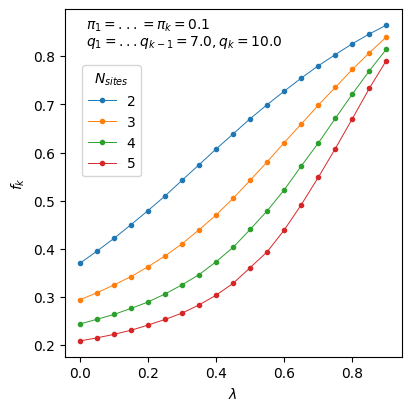

In [14]:
pi = 0.1
qlow = 7.0
qk = 10.0
Nsitess = [2,3,4,5]
N = 1000

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

for Nsites in Nsitess:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend(loc=(0.2,0.57), title = r'$N_{sites}$')
fig.text(0.2,0.94, rf'$\pi_1 = ... = \pi_k = {pi}$')
fig.text(0.2,0.90, rf'$q_1 = ... = q_{{k-1}} = {qlow}, q_k = {qk}$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')
fig.savefig('1.png')

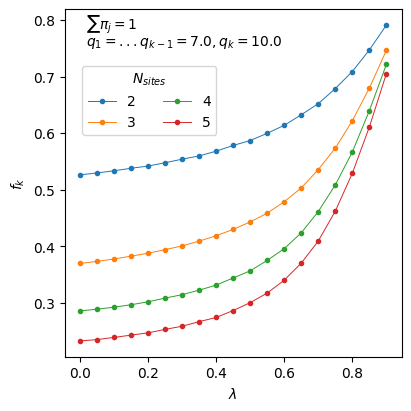

In [13]:
qlow = 7.0
qk = 10.0
Nsitess = [2,3,4,5]
pis = [0.5, 0.33, 0.25, 0.2]
N = 1000

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

for Nsites,pi in zip(Nsitess,pis):
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend(loc=(0.2,0.67), ncol=2, title = r'$N_{sites}$')
fig.text(0.2,0.94, rf'$\sum \pi_j = 1$')
fig.text(0.2,0.90, rf'$q_1 = ... q_{{k-1}} = {qlow}, q_k = {qk}$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')
fig.savefig('2.png')